In [1]:
#pour regler le probléme de thuncat == 
# !pip install matplotlib==3.1.0

In [2]:
%autosave 0
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

Autosave disabled


Using TensorFlow backend.


# Presentation des datas 

In [3]:
x = np.load('X.npy')
Y = np.load('Y.npy')

x.shape,Y.shape

((2062, 64, 64), (2062, 10))

In [4]:
no_tin = np.random.randint(0,100)
no_tin

51

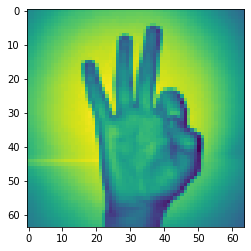

In [5]:
plt.imshow(x[no_tin])

# Data augmentation

In [6]:
def aug(X_aug,y_aug,aug_size):  
    
    ### Génération procédurale d'image #####
    
    X_aug = X_aug.reshape(2062,64,64,1)
    
    colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn',
              'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r',
              'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r',
              'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
              'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 
              'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 
              'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
              'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
              'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 
              'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 
              'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
              'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
              'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 
              'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r',
              'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
              'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
              'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
    
    datagen = idg(featurewise_center=True,samplewise_center=True, featurewise_std_normalization=True, 
                 samplewise_std_normalization=True, zca_whitening=True, zca_epsilon=1e-06,
                 rotation_range=30, width_shift_range=0.0, height_shift_range=0.0,
                 brightness_range=None,  shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, 
                 fill_mode='nearest',cval=0.0,  horizontal_flip=False,vertical_flip=True,rescale=None, 
                 preprocessing_function=None, data_format='channels_last', validation_split=0.0)

    # datagen.fit(nine2) # pour bien prendre en compte les blanchissements par ex, revient a standardisé les images
    nine3 = datagen.flow(X_aug,y_aug,batch_size=aug_size)[0]

    i=1
    for image in nine3[0] :
        choiceColor = colors[np.random.choice(172)]
        plt.subplot(3,3, i)
        plt.imshow(image.reshape(64,64),cmap=f'{choiceColor}')
        i+=1
        if i > 9 :
            break
    return nine3       

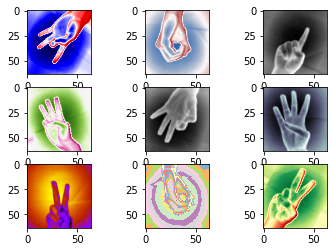

In [7]:
tup_x = []
tup_y = []

for i in range(4):
    tmp_x, tmp_y = aug(x,Y,5000) 
    tup_x.append(tmp_x)
    tup_y.append(tmp_y)
    
x_aug = np.concatenate(tup_x)
y_aug = np.concatenate(tup_y)

# Split et Création du modèle

In [8]:
x_aug.shape,y_aug.shape

((8248, 64, 64, 1), (8248, 10))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_aug, y_aug, test_size=0.3, random_state=42)

In [10]:
def create_cnn_classifier():
    
    model = Sequential()
    
    #etape 1 convolution
    model.add(Conv2D(16,(3,3),strides=1,input_shape=(64, 64, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #etape 2 couche sup
    model.add(Conv2D(16,(3,3),strides=1, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(8,(3,3),strides=1, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #etape 4 flattening
    model.add(Flatten())
    
    #etape 5 reseau connecté
    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])  
    return model   

In [11]:
model = create_cnn_classifier()


# Entrainement du modèle

In [12]:
history = model.fit(X_train,y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Train on 5773 samples, validate on 2475 samples
Epoch 1/100
5773/5773 [==============================] - 28s 5ms/step - loss: 1.6039 - accuracy: 0.4254 - val_loss: 1.0237 - val_accuracy: 0.6380
Epoch 2/100
5773/5773 [==============================] - 24s 4ms/step - loss: 0.9573 - accuracy: 0.6652 - val_loss: 0.7452 - val_accuracy: 0.7394
Epoch 3/100
5773/5773 [==============================] - 27s 5ms/step - loss: 0.7738 - accuracy: 0.7254 - val_loss: 0.5423 - val_accuracy: 0.8174
Epoch 4/100
5773/5773 [==============================] - 23s 4ms/step - loss: 0.6568 - accuracy: 0.7674 - val_loss: 0.5081 - val_accuracy: 0.8303
Epoch 5/100
5773/5773 [==============================] - 26s 4ms/step - loss: 0.5752 - accuracy: 0.7946 - val_loss: 0.4927 - val_accuracy: 0.8477
Epoch 6/100
5773/5773 [==============================] - 23s 4ms/step - loss: 0.5282 - accuracy: 0.8081 - val_loss: 0.4000 - val_accuracy: 0.8760
Epoch 7/100
5773/5773 [==============================] - 25s 4ms/step - loss

5773/5773 [==============================] - 15s 3ms/step - loss: 0.1923 - accuracy: 0.9318 - val_loss: 0.3323 - val_accuracy: 0.9285
Epoch 57/100
5773/5773 [==============================] - 16s 3ms/step - loss: 0.1843 - accuracy: 0.9375 - val_loss: 0.3470 - val_accuracy: 0.9269
Epoch 58/100
5773/5773 [==============================] - 27s 5ms/step - loss: 0.1949 - accuracy: 0.9356 - val_loss: 0.3465 - val_accuracy: 0.9240
Epoch 59/100
5773/5773 [==============================] - 26s 4ms/step - loss: 0.1804 - accuracy: 0.9408 - val_loss: 0.3777 - val_accuracy: 0.9333
Epoch 60/100
5773/5773 [==============================] - 16s 3ms/step - loss: 0.1663 - accuracy: 0.9465 - val_loss: 0.2974 - val_accuracy: 0.9349
Epoch 61/100
5773/5773 [==============================] - 22s 4ms/step - loss: 0.1738 - accuracy: 0.9397 - val_loss: 0.3548 - val_accuracy: 0.9200
Epoch 62/100
5773/5773 [==============================] - 20s 4ms/step - loss: 0.1673 - accuracy: 0.9447 - val_loss: 0.3570 - val_a

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 8)          

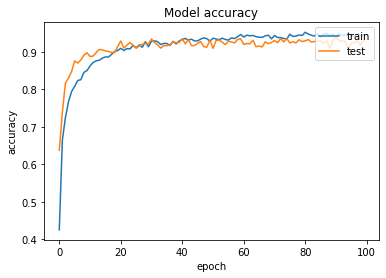

In [14]:
def hist_foll(metrics):
    plt.plot(history.history[f'{metrics}'])
    plt.plot(history.history[f"val_{metrics}"])
    plt.grid = True
    plt.title(f'Model {metrics}')
    plt.ylabel(f'{metrics}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show

hist_foll('accuracy')

# Evaluation du modèle

In [15]:
pred = model.predict(X_test)

In [16]:
y_test = y_test.argmax(axis=1)
pred_re = pred.argmax(axis=1)

In [17]:
print(accuracy_score(y_test, pred_re))

0.9309090909090909


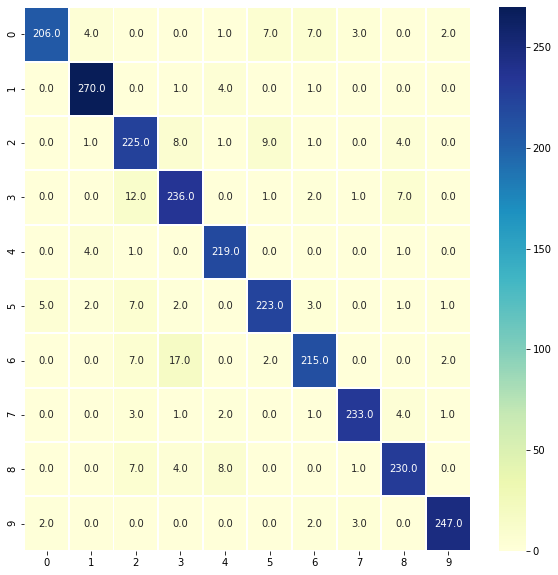

In [18]:
plt.figure(figsize=(10,10))
conf = confusion_matrix(y_test,pred_re)
# df = DataFrame(data=conf)
ax = sns.heatmap(conf,fmt=".1f",annot=True, linewidths=.9,cmap="YlGnBu")


# StratifiedKFold

In [19]:
seed = 69
np.random.seed(seed)
# define 7-fold cross validation test harness
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=seed)
cvscores = []

In [24]:
count_step = 0
for T, V in kfold.split(x_aug, y_aug.argmax(axis=1)):
    model_k = create_cnn_classifier()
    model_k.fit(x_aug[T],y_aug[T], epochs=30, batch_size=10, validation_data=(x_aug[V],y_aug[V]))
    count_step +=1
    print(f"step : {count_step}")
    scores = model_k.evaluate(x_aug[V], y_aug[V], verbose=0)
    print("%s: %.2f%%" % (model_k.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    


Train on 7065 samples, validate on 1183 samples
Epoch 1/30
7065/7065 [==============================] - 27s 4ms/step - loss: 1.4259 - accuracy: 0.4822 - val_loss: 0.8043 - val_accuracy: 0.7278
Epoch 2/30
7065/7065 [==============================] - 25s 3ms/step - loss: 0.8051 - accuracy: 0.7130 - val_loss: 0.6485 - val_accuracy: 0.7870
Epoch 3/30
7065/7065 [==============================] - 25s 3ms/step - loss: 0.6448 - accuracy: 0.7721 - val_loss: 0.4953 - val_accuracy: 0.8436
Epoch 4/30
7065/7065 [==============================] - 25s 3ms/step - loss: 0.5502 - accuracy: 0.8065 - val_loss: 0.4187 - val_accuracy: 0.8698
Epoch 5/30
7065/7065 [==============================] - 24s 3ms/step - loss: 0.4836 - accuracy: 0.8285 - val_loss: 0.4255 - val_accuracy: 0.8504
Epoch 6/30
7065/7065 [==============================] - 25s 3ms/step - loss: 0.4384 - accuracy: 0.8440 - val_loss: 0.3703 - val_accuracy: 0.8749
Epoch 7/30
7065/7065 [==============================] - 25s 3ms/step - loss: 0.410

7066/7066 [==============================] - 24s 3ms/step - loss: 0.2704 - accuracy: 0.9053 - val_loss: 0.3439 - val_accuracy: 0.9052
Epoch 27/30
7066/7066 [==============================] - 24s 3ms/step - loss: 0.2531 - accuracy: 0.9118 - val_loss: 0.3811 - val_accuracy: 0.9162
Epoch 28/30
7066/7066 [==============================] - 24s 3ms/step - loss: 0.2426 - accuracy: 0.9198 - val_loss: 0.3365 - val_accuracy: 0.9179
Epoch 29/30
7066/7066 [==============================] - 24s 3ms/step - loss: 0.2454 - accuracy: 0.9127 - val_loss: 0.3290 - val_accuracy: 0.9230
Epoch 30/30
7066/7066 [==============================] - 24s 3ms/step - loss: 0.2496 - accuracy: 0.9127 - val_loss: 0.2921 - val_accuracy: 0.9340
step : 2
accuracy: 93.40%
Train on 7069 samples, validate on 1179 samples
Epoch 1/30
7069/7069 [==============================] - 26s 4ms/step - loss: 1.5072 - accuracy: 0.4569 - val_loss: 0.8368 - val_accuracy: 0.7303
Epoch 2/30
7069/7069 [==============================] - 24s 3ms

7069/7069 [==============================] - 26s 4ms/step - loss: 0.2252 - accuracy: 0.9185 - val_loss: 0.2748 - val_accuracy: 0.9118
Epoch 22/30
7069/7069 [==============================] - 26s 4ms/step - loss: 0.2343 - accuracy: 0.9201 - val_loss: 0.2644 - val_accuracy: 0.9220
Epoch 23/30
7069/7069 [==============================] - 25s 4ms/step - loss: 0.2136 - accuracy: 0.9274 - val_loss: 0.2724 - val_accuracy: 0.9177
Epoch 24/30
7069/7069 [==============================] - 25s 4ms/step - loss: 0.2181 - accuracy: 0.9228 - val_loss: 0.2877 - val_accuracy: 0.9160
Epoch 25/30
7069/7069 [==============================] - 25s 4ms/step - loss: 0.2181 - accuracy: 0.9238 - val_loss: 0.2873 - val_accuracy: 0.9084
Epoch 26/30
7069/7069 [==============================] - 25s 4ms/step - loss: 0.2167 - accuracy: 0.9247 - val_loss: 0.3335 - val_accuracy: 0.9050
Epoch 27/30
7069/7069 [==============================] - 25s 4ms/step - loss: 0.2289 - accuracy: 0.9184 - val_loss: 0.2712 - val_accurac

7074/7074 [==============================] - 25s 4ms/step - loss: 0.2949 - accuracy: 0.8972 - val_loss: 0.2561 - val_accuracy: 0.9250
Epoch 17/30
7074/7074 [==============================] - 26s 4ms/step - loss: 0.2914 - accuracy: 0.8982 - val_loss: 0.2435 - val_accuracy: 0.9208
Epoch 18/30
7074/7074 [==============================] - 25s 4ms/step - loss: 0.2834 - accuracy: 0.8916 - val_loss: 0.2820 - val_accuracy: 0.9046
Epoch 19/30
7074/7074 [==============================] - 24s 3ms/step - loss: 0.2911 - accuracy: 0.8947 - val_loss: 0.2607 - val_accuracy: 0.9284
Epoch 20/30
7074/7074 [==============================] - 25s 4ms/step - loss: 0.2665 - accuracy: 0.9107 - val_loss: 0.2569 - val_accuracy: 0.9182
Epoch 21/30
7074/7074 [==============================] - 26s 4ms/step - loss: 0.2730 - accuracy: 0.9050 - val_loss: 0.3053 - val_accuracy: 0.9106
Epoch 22/30
7074/7074 [==============================] - 24s 3ms/step - loss: 0.2718 - accuracy: 0.9032 - val_loss: 0.2396 - val_accurac

In [25]:
cvscores

[92.81487464904785,
 93.40101480484009,
 92.96013712882996,
 91.85750484466553,
 90.91680645942688,
 94.20783519744873,
 92.58311986923218]

In [26]:
print(f"{np.mean(cvscores):.2f}% (+/- {np.std(cvscores):.2f}%) ")

92.68% (+/- 0.98%) 
